# Detect blurred images and face in ROSbag

**This project aims at reducing bandwidth taken by the image ROS topic of the pepper robot**

We want to filter out, blurred images to reduce amount of data we have to deal with inside the pipeline

In [5]:
# import the necessary packages
from imutils    import paths
from matplotlib import pyplot as plt
from tools      import check_if_blurred # import custom functions
import cv2
import face_recognition
import os
import shutil

In [6]:
threshold  = 2000.0  # seems to be the best threshold for our dataset

base_path ='../dataset'

image_path   = base_path + '/original'
dest_blurred = base_path + '/blurred'
dest_sharp   = base_path + '/sharp'

In [7]:
if not os.path.exists(dest_blurred):
    os.makedirs(dest_blurred)
    
if not os.path.exists(dest_sharp):
    os.makedirs(dest_sharp)

In [8]:
check_if_blurred(image_path, threshold, copy=False, logging=True)

Detected 474 blurred images out of 1379
Blurred image ratio : 0.34372733865119653


0.34372733865119653

## Check blurry image

In [7]:
image_generator = paths.list_images(image_path)
first_image = None
for i in range(23):
    first_image = next(image_generator)

Sharp


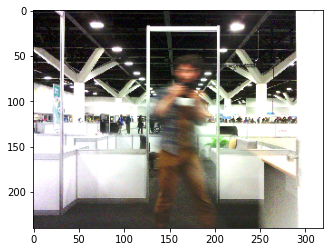

In [8]:
image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")
    
plt.imshow(image)

## Check sharp images

In [9]:
for i in range(14):
    first_image = next(image_generator)

Blurry


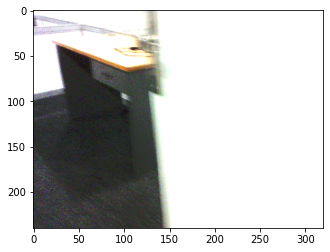

In [10]:
image = cv2.imread(first_image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fm = variance_of_laplacian(gray)
text = "Not Blurry"
# if the focus measure is less than the supplied threshold,
# then the image should be considered "blurry"
if fm < threshold:
    print("Blurry")
else:
    print("Sharp")
    
plt.imshow(image)